<a href="https://colab.research.google.com/github/ingrafaeln/Ciencia-de-Datos/blob/main/Seccion_1/Ejemplo_2_unsurance_cost_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos: Predicción de Costos de Seguro Médico

## Introducción

En este notebook, vamos a realizar un **Análisis Exploratorio de Datos (EDA)** sobre un conjunto de datos de costos de seguros de salud. Este es un problema de **regresión**, ya que nuestro objetivo final sería predecir un valor numérico continuo: el costo (`charges`) del seguro.

El EDA nos permitirá entender las características de los asegurados y descubrir qué factores, como la edad, el índice de masa corporal (IMC) o si son fumadores, tienen un mayor impacto en el costo final del seguro.

**Librerías que usaremos:**
* **Pandas:** Para cargar y manipular los datos.
* **Matplotlib y Seaborn:** Para crear visualizaciones y entender mejor los datos.
* **OS:** Para manejar las rutas de los archivos de forma eficiente.

## Paso 1: Preparación del Entorno

Al igual que en otros proyectos, el primer paso es asegurar que nuestro notebook funcione en cualquier entorno. El siguiente código detecta si estamos usando Google Colab para descargar los datos automáticamente.

In [1]:
# Propósito: Verificar si el notebook se está ejecutando en Google Colab.

# Explicación del código:
# Se intenta importar la librería 'google.colab'. Si tiene éxito, la variable IN_COLAB
# se establece en True. Si falla (porque no estamos en Colab), se establece en False.
# Esto nos permite ejecutar código específico para cada entorno.

try:
    import google.colab
    IN_COLAB = True
    print("Entorno de Google Colab detectado.")
except:
    IN_COLAB = False
    print("Entorno local (o diferente a Colab) detectado.")

Entorno de Google Colab detectado.


In [2]:
# Propósito: Si estamos en Google Colab, descargar y preparar los datos desde GitHub.

# Explicación del código:
# - 'if IN_COLAB:': Este bloque solo se ejecuta si la variable anterior es True.
# - '!wget': Descarga el repositorio como un archivo .zip.
# - '!unzip': Descomprime el archivo. La opción '-q' lo hace en modo silencioso.
# - '!mv': Mueve la carpeta 'datasets' a una nueva ubicación llamada 'datasets_github'.
# - '!rm -rf': Elimina los archivos y carpetas temporales para mantener el entorno limpio.

if IN_COLAB:
    print("Descargando y preparando los datos para Colab...")
    # La URL de este repositorio es diferente al del ejemplo anterior.
    !wget -O datasets.zip https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
    !unzip -q datasets.zip
    !mv CienciaDatos-MASDI-main/datasets ./datasets_github
    !rm -rf datasets.zip CienciaDatos-MASDI-main
    print("Datos listos.")

Descargando y preparando los datos para Colab...
--2025-10-02 22:49:03--  https://github.com/ingrafaeln/Ciencia-de-Datos/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main [following]
--2025-10-02 22:49:03--  https://codeload.github.com/ingrafaeln/Ciencia-de-Datos/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘datasets.zip’

datasets.zip            [  <=>               ]   4.66M  11.5MB/s    in 0.4s    

2025-10-02 22:49:03 (11.5 MB/s) - ‘datasets.zip’ saved [4888316]

mv: cannot stat 'CienciaDatos-MASDI-main/datasets': No such file 

## Paso 2: Carga de Datos en un DataFrame

Con el entorno listo, procedemos a cargar nuestro archivo `insurance_cost.csv` en un DataFrame de `pandas`. Esta estructura tabular es ideal para el análisis que vamos a realizar.

In [ ]:
# Propósito: Importar librerías y cargar el dataset en un DataFrame.

# Instrucciones: Si trabajas localmente, asegúrate de tener la carpeta 'datasets'
# en el directorio correcto.

# Librerías a importar:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Construcción de la ruta del archivo:
# Este código se adapta automáticamente si estás en Colab o en un entorno local.
dir_root = os.getcwd()
datasets_folder_name = 'datasets_github' if IN_COLAB else 'datasets'
# Nota que ahora accedemos a la subcarpeta 'regression' y al archivo 'insurance_cost.csv'.
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'regression', 'insurance_cost.csv')

# Carga del dataset en el DataFrame 'data':
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas para una verificación rápida:
print("Datos cargados. Estas son las primeras 5 filas:")
data.head()

Datos cargados. Estas son las primeras 5 filas:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Paso 3: Análisis Exploratorio de Datos (EDA)

Ahora comienza la fase de descubrimiento. Vamos a analizar el DataFrame `data` desde diferentes ángulos.

### 3.1 Información General del DataFrame

Obtenemos un resumen técnico para conocer la estructura de los datos.

In [ ]:
# Propósito: Obtener un resumen de la estructura del DataFrame, incluyendo tipos de datos y valores no nulos.
# Parámetros: Ninguno.

data.info()

# --- Interpretación de los Resultados ---
# RangeIndex: 1338 entries -> Tenemos 1338 registros (filas) y 7 columnas.
# Non-Null Count: Todas las columnas muestran '1338 non-null', lo que significa que no hay valores faltantes. ¡Excelente!
# Dtype:
#   - 'int64' (age, children): Números enteros.
#   - 'float64' (bmi, charges): Números con decimales.
#   - 'object' (sex, smoker, region): Texto o variables categóricas.
# Variable Objetivo: 'charges' es la variable que queremos predecir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3.2 Estadísticas Descriptivas

Calculamos las estadísticas básicas para las columnas numéricas. Esto nos ayuda a entender la distribución y la escala de cada variable.

In [ ]:
# Propósito: Generar estadísticas como media, desviación estándar, mínimo y máximo para las columnas numéricas.
# Parámetros: Ninguno.

data.describe()

# --- Interpretación de los Resultados ---
# age: La edad de los asegurados va de 18 a 64 años, con un promedio de 39.
# bmi: El Índice de Masa Corporal (IMC) promedio es de 30.66. Un IMC por encima de 30 se considera obesidad.
# children: Los asegurados tienen en promedio 1 hijo. El máximo es 5.
# charges: ¡Aquí hay algo interesante! La media es $13,270, pero la desviación estándar (std) es de $12,110, un valor muy alto.
#          Esto sugiere que los costos están muy dispersos. El valor máximo ($63,770) es mucho más alto que el 75% de los datos ($16,639),
#          lo que indica una distribución sesgada.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3.3 Explorando la Variable Objetivo (`charges`)

En un problema de regresión, es crucial analizar la variable que queremos predecir. Un histograma nos mostrará su distribución.

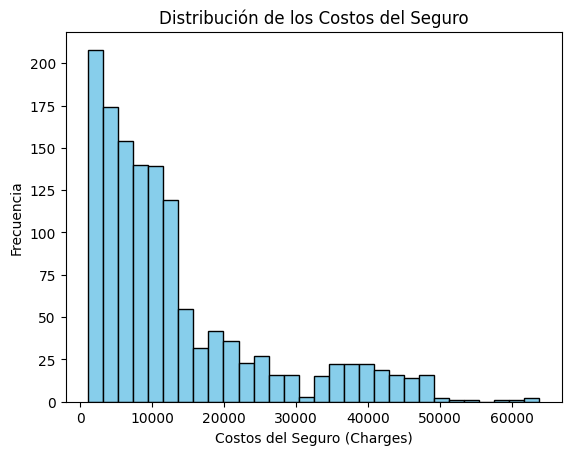

In [ ]:
# Propósito: Visualizar la distribución de la columna 'charges'.

# - plt.hist(): Función de Matplotlib para crear un histograma.
#   - Parámetros de entrada:
#     - data['charges']: La columna de datos que queremos graficar.
#     - bins=30: El número de barras que tendrá el histograma. Más barras dan más detalle.
# - plt.xlabel, plt.ylabel, plt.title: Añaden etiquetas para que el gráfico sea comprensible.

plt.hist(data['charges'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Costos del Seguro (Charges)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Costos del Seguro')
plt.show()

# --- Interpretación de los Resultados ---
# El histograma confirma lo que sospechábamos con .describe(). La distribución está fuertemente
# sesgada hacia la derecha. La mayoría de las personas tienen costos bajos, pero hay un pequeño número
# de personas con costos extremadamente altos. Esta es una pista clave para nuestro modelo.

### 3.4 Correlación entre Variables

Veamos cómo se relacionan las variables numéricas entre sí, y especialmente, cómo se relacionan con `charges`.

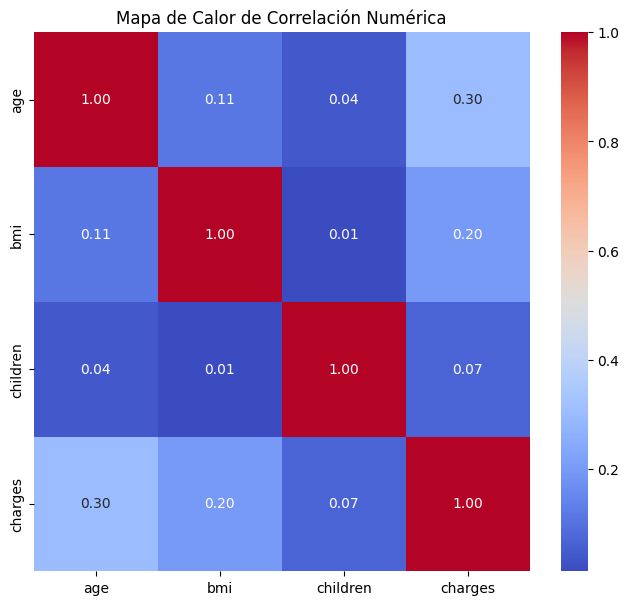

In [ ]:
# Propósito: Visualizar la matriz de correlación en un mapa de calor.

# 1. Calcular la matriz de correlación solo para columnas numéricas.
correlation_matrix = data.corr(numeric_only=True)

# 2. Crear el gráfico.
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') # 'fmt' formatea los números a 2 decimales.
plt.title("Mapa de Calor de Correlación Numérica")
plt.show()

# --- Interpretación de los Resultados ---
# Observando la fila/columna 'charges':
# - 'age' tiene una correlación positiva de 0.30. A medida que aumenta la edad, el costo tiende a aumentar.
# - 'bmi' tiene una correlación de 0.20. A mayor IMC, el costo también tiende a ser mayor.
# - 'children' tiene una correlación muy baja (0.07).
# La correlación más fuerte es con la edad, pero sigue siendo moderada. Esto sugiere que las variables
# categóricas (como 'smoker') podrían tener un impacto muy grande.

### 3.5 Distribución de Variables Categóricas

Ahora, analicemos las variables de texto (`smoker` y `region`) para ver cómo se distribuyen los clientes.

smoker
no     1064
yes     274
Name: count, dtype: int64


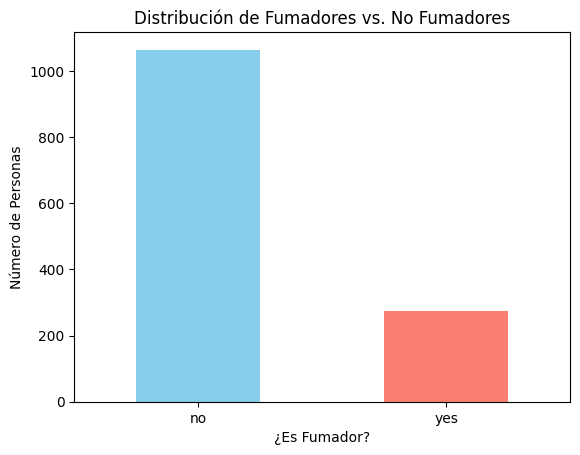

In [ ]:
# Propósito: Visualizar la distribución de la variable 'smoker' (fumador).

# 1. Contar las categorías.
smoker_counts = data['smoker'].value_counts()
print(smoker_counts)

# 2. Crear el gráfico de barras.
smoker_counts.plot(kind='bar', rot=0, color=['skyblue', 'salmon'])
plt.title("Distribución de Fumadores vs. No Fumadores")
plt.xlabel("¿Es Fumador?")
plt.ylabel("Número de Personas")
plt.show()

# --- Interpretación de los Resultados ---
# Hay una gran mayoría de no fumadores (1064) en comparación con los fumadores (274).
# Esta variable es probablemente un predictor muy fuerte del costo del seguro.

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


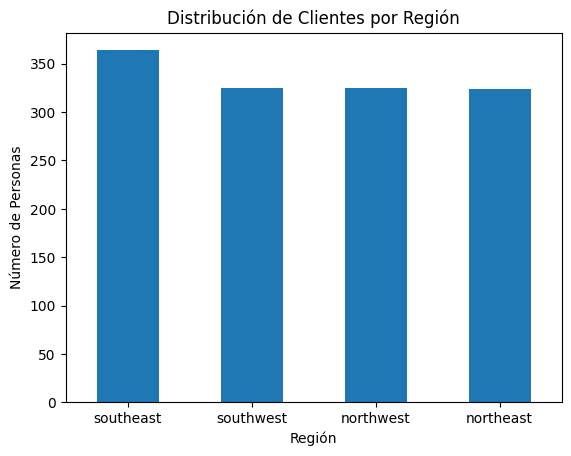

In [ ]:
# Propósito: Visualizar la distribución de la variable 'region'.

# 1. Contar las categorías.
region_counts = data['region'].value_counts()
print(region_counts)

# 2. Crear el gráfico de barras.
region_counts.plot(kind='bar', rot=0)
plt.title("Distribución de Clientes por Región")
plt.xlabel("Región")
plt.ylabel("Número de Personas")
plt.show()

# --- Interpretación de los Resultados ---
# La distribución de clientes entre las cuatro regiones es bastante equilibrada,
# aunque la región 'southeast' tiene una ligera mayoría.

## Conclusiones del Análisis y Próximos Pasos

Hemos explorado a fondo el dataset de costos de seguros y hemos descubierto información muy valiosa:

1.  **Datos Limpios:** El dataset está completo y no tiene valores faltantes.
2.  **Factor Clave:** La variable `charges` está muy sesgada. Los costos altos, aunque son pocos, son muy extremos.
3.  **Correlaciones Numéricas:** La edad (`age`) y el IMC (`bmi`) tienen una correlación positiva moderada con los costos.
4.  **Importancia Categórica:** Existe un desbalance significativo entre fumadores y no fumadores. Sospechamos que ser fumador (`smoker` = 'yes') es uno de los predictores más importantes de los altos costos.
5.  **Distribución Geográfica:** Los clientes están distribuidos de manera bastante uniforme por región.

**Sugerencias para el próximo paso:**

* **Visualizaciones Avanzadas:** Crear gráficos de cajas (boxplots) o de dispersión (scatter plots) para ver cómo `charges` varía entre fumadores y no fumadores, o cómo se relaciona con `age` y `bmi`.
* **Preprocesamiento:** Convertir las variables categóricas ('sex', 'smoker', 'region') a un formato numérico para que puedan ser utilizadas por un modelo de machine learning (por ejemplo, mediante One-Hot Encoding).
* **Modelado:** Dividir los datos en conjuntos de entrenamiento y prueba para construir y evaluar un modelo de regresión (como Regresión Lineal).

¡Este análisis nos da una excelente base para construir un modelo predictivo muy potente! Si quieres seguir con alguno de estos pasos, ¡estaré aquí para ayudarte!